In [1]:
import os

In [76]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rlutil import plot_utils
sns.set()
sns.set_style('white')
# sns.set_context("paper", font_scale = 1)

In [3]:
def smooth(x, alpha=0.9):
    x = np.array(x)
    y = np.zeros_like(x)
    y[0] = x[0]
    for i in range(1, len(x)):
        new_alpha = min(alpha, i / (i+1))
        y[i] = new_alpha * y[i-1] + (1-new_alpha) * x[i]
    return y

In [13]:
def plot_dfs(dfs, key, sm=0.99, traces=True, ax=None, label=None, trace_kwargs=dict(), normal_kwargs=dict()):
    if ax is None: ax = plt.gca()
    mean_df = plot_utils.aggregate_mean(dfs)
    line, = ax.plot(mean_df['iteration'], smooth(mean_df[key], sm), label=label, **normal_kwargs)
    if traces:
        for df in dfs:
            ax.plot(df['iteration'][2:], smooth(df[key], sm)[2:], c=line.get_color(), alpha=0.2, **trace_kwargs)

In [5]:
from rlutil.plot_logger import Logger
logger = Logger('plots/')

In [15]:
import glob


/nfs/kun2/users/dibya/libraries/rlutil/rlutil/plot_logger.py:46: UserWarning: No data captured. Pass in data to logger.savefig(..., data=data). 
 If no data is to be stored, use argument `no_data=True`.
  warnings.warn('No data captured. Pass in data to logger.savefig(..., data=data). \n If no data is to be stored, use argument `no_data=True`.')
/nfs/kun2/users/dibya/libraries/rlutil/rlutil/plot_logger.py:54: UserWarning: No code captured. Preface cell with %%savefig_code. If no code is to be stored, use argument `no_code=True` 
  warnings.warn('No code captured. Preface cell with %%savefig_code. If no code is to be stored, use argument `no_code=True` ')


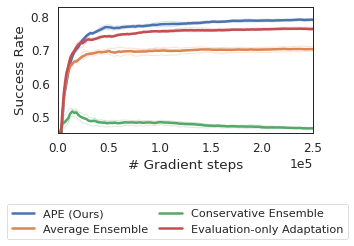

In [97]:
sns.set_context("paper", font_scale=1.4)   
# sns.set_context("poster", font_scale=1.1)
fig = plt.figure(figsize=(4.5, 3.5))
ape_dfs = [pd.read_csv(csv).dropna() for csv in glob.glob('logs/locked_doors/ape/*.csv')]
plot_dfs(ape_dfs, 'evaluation/average_is_successs', label='APE (Ours)', normal_kwargs=dict(linewidth=2.5))
sql_dfs = [pd.read_csv(csv).dropna() for csv in glob.glob('logs/locked_doors/sql/*.csv')]
plot_dfs(sql_dfs, 'evaluation/average_is_successs', label='Average Ensemble', normal_kwargs=dict(linewidth=2.5))
plot_dfs(sql_dfs, 'conservative_evaluation/average_is_successs', label='Conservative Ensemble', normal_kwargs=dict(linewidth=2.5))
plot_dfs(sql_dfs, 'adaptive_evaluation/average_is_successs', label='Evaluation-only Adaptation', normal_kwargs=dict(linewidth=2.5))

'evaluation/average_is_successs'
handles, labels = plt.gca().get_legend_handles_labels()
plt.gcf().legend(handles, labels, loc='lower center', ncol=2, columnspacing=1.0, bbox_to_anchor=(0.5, 0.0), fontsize='small')
plt.tight_layout(rect=(0, 0.3, 1.0, 1.0))
plt.xlabel('# Gradient steps')
plt.ylabel('Success Rate')
plt.ylim(0.45, 0.83)
plt.tick_params(labelsize=12, )
plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
plt.xlim(0, 2.5e5)
logger.savefig('locked_doors')

In [74]:
def to_arr(x):
    return np.array([x[i] for i in range(len(x))])
conservative_success = to_arr({2: 0.06060606060606061,
 5: 1.0,
 3: 0.07407407407407407,
 4: 0.7142857142857143,
 0: 0.0,
 1: 0.0})
avg_success = to_arr({3: 0.9375,
 1: 0.21212121212121213,
 4: 1.0,
 5: 1.0,
 0: 0.0,
 2: 0.46153846153846156})

adaptive_success = to_arr({3: 0.96875,
 1: 0.36363636363636365,
 4: 1.0,
 5: 1.0,
 0: 0.0,
 2: 0.7538461538461539})

/nfs/kun2/users/dibya/libraries/rlutil/rlutil/plot_logger.py:46: UserWarning: No data captured. Pass in data to logger.savefig(..., data=data). 
 If no data is to be stored, use argument `no_data=True`.
  warnings.warn('No data captured. Pass in data to logger.savefig(..., data=data). \n If no data is to be stored, use argument `no_data=True`.')
/nfs/kun2/users/dibya/libraries/rlutil/rlutil/plot_logger.py:54: UserWarning: No code captured. Preface cell with %%savefig_code. If no code is to be stored, use argument `no_code=True` 
  warnings.warn('No code captured. Preface cell with %%savefig_code. If no code is to be stored, use argument `no_code=True` ')


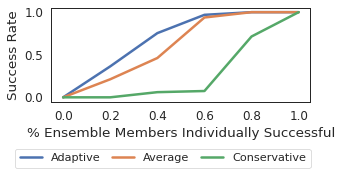

In [94]:
sns.set_context("paper", font_scale=1.4)   

fig = plt.figure(figsize=(4.5, 2.5))

X = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
plt.plot(X, adaptive_success, linewidth=2.5, label='Adaptive')
plt.plot(X, avg_success, linewidth=2.5, label='Average')
plt.plot(X, conservative_success, linewidth=2.5, label='Conservative')

handles, labels = plt.gca().get_legend_handles_labels()
plt.gcf().legend(handles, labels, loc='lower center', ncol=3, columnspacing=1.0, bbox_to_anchor=(0.5, 0.0), fontsize='small')
plt.tight_layout(rect=(0, 0.2, 1.0, 1.0))
plt.xlabel('% Ensemble Members Individually Successful')
plt.ylabel('Success Rate')
# plt.ylim(0.45, 0.83)
plt.tick_params(labelsize=12, )
# plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
logger.savefig('resiliency')

/nfs/kun2/users/dibya/libraries/rlutil/rlutil/plot_logger.py:46: UserWarning: No data captured. Pass in data to logger.savefig(..., data=data). 
 If no data is to be stored, use argument `no_data=True`.
  warnings.warn('No data captured. Pass in data to logger.savefig(..., data=data). \n If no data is to be stored, use argument `no_data=True`.')
/nfs/kun2/users/dibya/libraries/rlutil/rlutil/plot_logger.py:54: UserWarning: No code captured. Preface cell with %%savefig_code. If no code is to be stored, use argument `no_code=True` 
  warnings.warn('No code captured. Preface cell with %%savefig_code. If no code is to be stored, use argument `no_code=True` ')


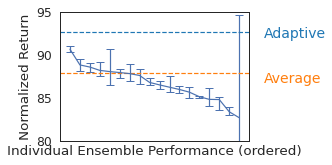

In [145]:
fig = plt.figure(figsize=(4.5, 2.5))

sorted_rets = np.load('logs/walker2d_rets.npz')['arr_0']
X = np.arange(18)
plt.errorbar(X, np.mean(sorted_rets, 1), np.array([(np.mean(x) - np.min(x), np.max(x) - np.mean(x)) for x in sorted_rets]).T, capsize=4)
plt.hlines(92.7, -1, 21, linestyle='--', color='tab:blue')# plt.ylim(70, 90)
plt.hlines(87.9, -1, 21, linestyle='--', color='tab:orange')# plt.ylim(70, 90)
plt.ylim(80, 95)
plt.xlim(-1, 18)
plt.gcf().text( 0.8, 0.75, 'Adaptive', fontsize=14, color='tab:blue')
plt.gcf().text(0.8, 0.5, 'Average', fontsize=14, color='tab:orange')
plt.xticks([])
plt.xlabel('Individual Ensemble Performance (ordered)')
plt.ylabel('Normalized Return')
plt.tight_layout(rect=(0, 0, 0.8, 1.0))
logger.savefig('adaptation_d4rl')